# Heatmaps pour les données de L4L
- Pour les HM normalisées, les colonnes sont classées dans l'ordre des fréquences pour les données complètes, cet ordre est dans *colsCompletL4L*
- *colsCompletL4L* doit être stocké lors du calcul pour l'échantillon complet
    - colsCompletL4L=hmCols
    - %store colsCompletL4L
- *colsCompletL4L* doit être récupéré pour les autres calculs
    - %store -r colsCompletL4L

In [1]:
import itertools as it
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [24]:
repL4L="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/L4L/IMM21/"
fName="IMM21-00-X-paradigmes.csv"
fSource=repL4L+fName

In [25]:
dfSource=pd.read_csv(fSource,sep=";",encoding="utf8")
if "Morphomes" in fName:
    cols=dfSource.columns.tolist()[1:]
else:
    cols=dfSource.columns.tolist()[2:]

In [26]:
coforms={}
for (c1,c2) in it.combinations_with_replacement(cols,2):
    if c1 not in coforms: coforms[c1]={}
    coforms[c1][c2]=dfSource[[c1,c2]].dropna().count()[0]
    if c2 not in coforms: coforms[c2]={}
    coforms[c2][c1]=dfSource[[c1,c2]].dropna().count()[0]

In [27]:
%store -r colsCompletL4L

In [28]:
if fName=="IMM21-01-X-paradigmes.csv":
    sortCols={}
    for k,v in coforms.iteritems():
        for kk,vv in v.iteritems():
            if k==kk:
                sortCols[k]=vv
    hmCols=sorted(sortCols, key=sortCols.get, reverse=True)
else:
    hmCols=colsCompletL4L

In [29]:
dfCoforms=pd.DataFrame(coforms)
dfCoforms=dfCoforms[hmCols].reindex(hmCols)

In [30]:
%store -r pltCellColors
def colorerXTicks(gAX,fSize=12):
    xlabels=gAX.get_xticklabels()
    for xlabel in xlabels:
        xtext=xlabel.get_text()
        xlabel.set_backgroundcolor(pltCellColors[xtext])
        xlabel.set_family("monospace")
        
def colorerYTicks(gAX,fSize=12):
    ylabels=gAX.get_yticklabels()
    for ylabel in ylabels:
        ytext=ylabel.get_text()
        ylabel.set_backgroundcolor(pltCellColors[ytext])
        ylabel.set_family("monospace")

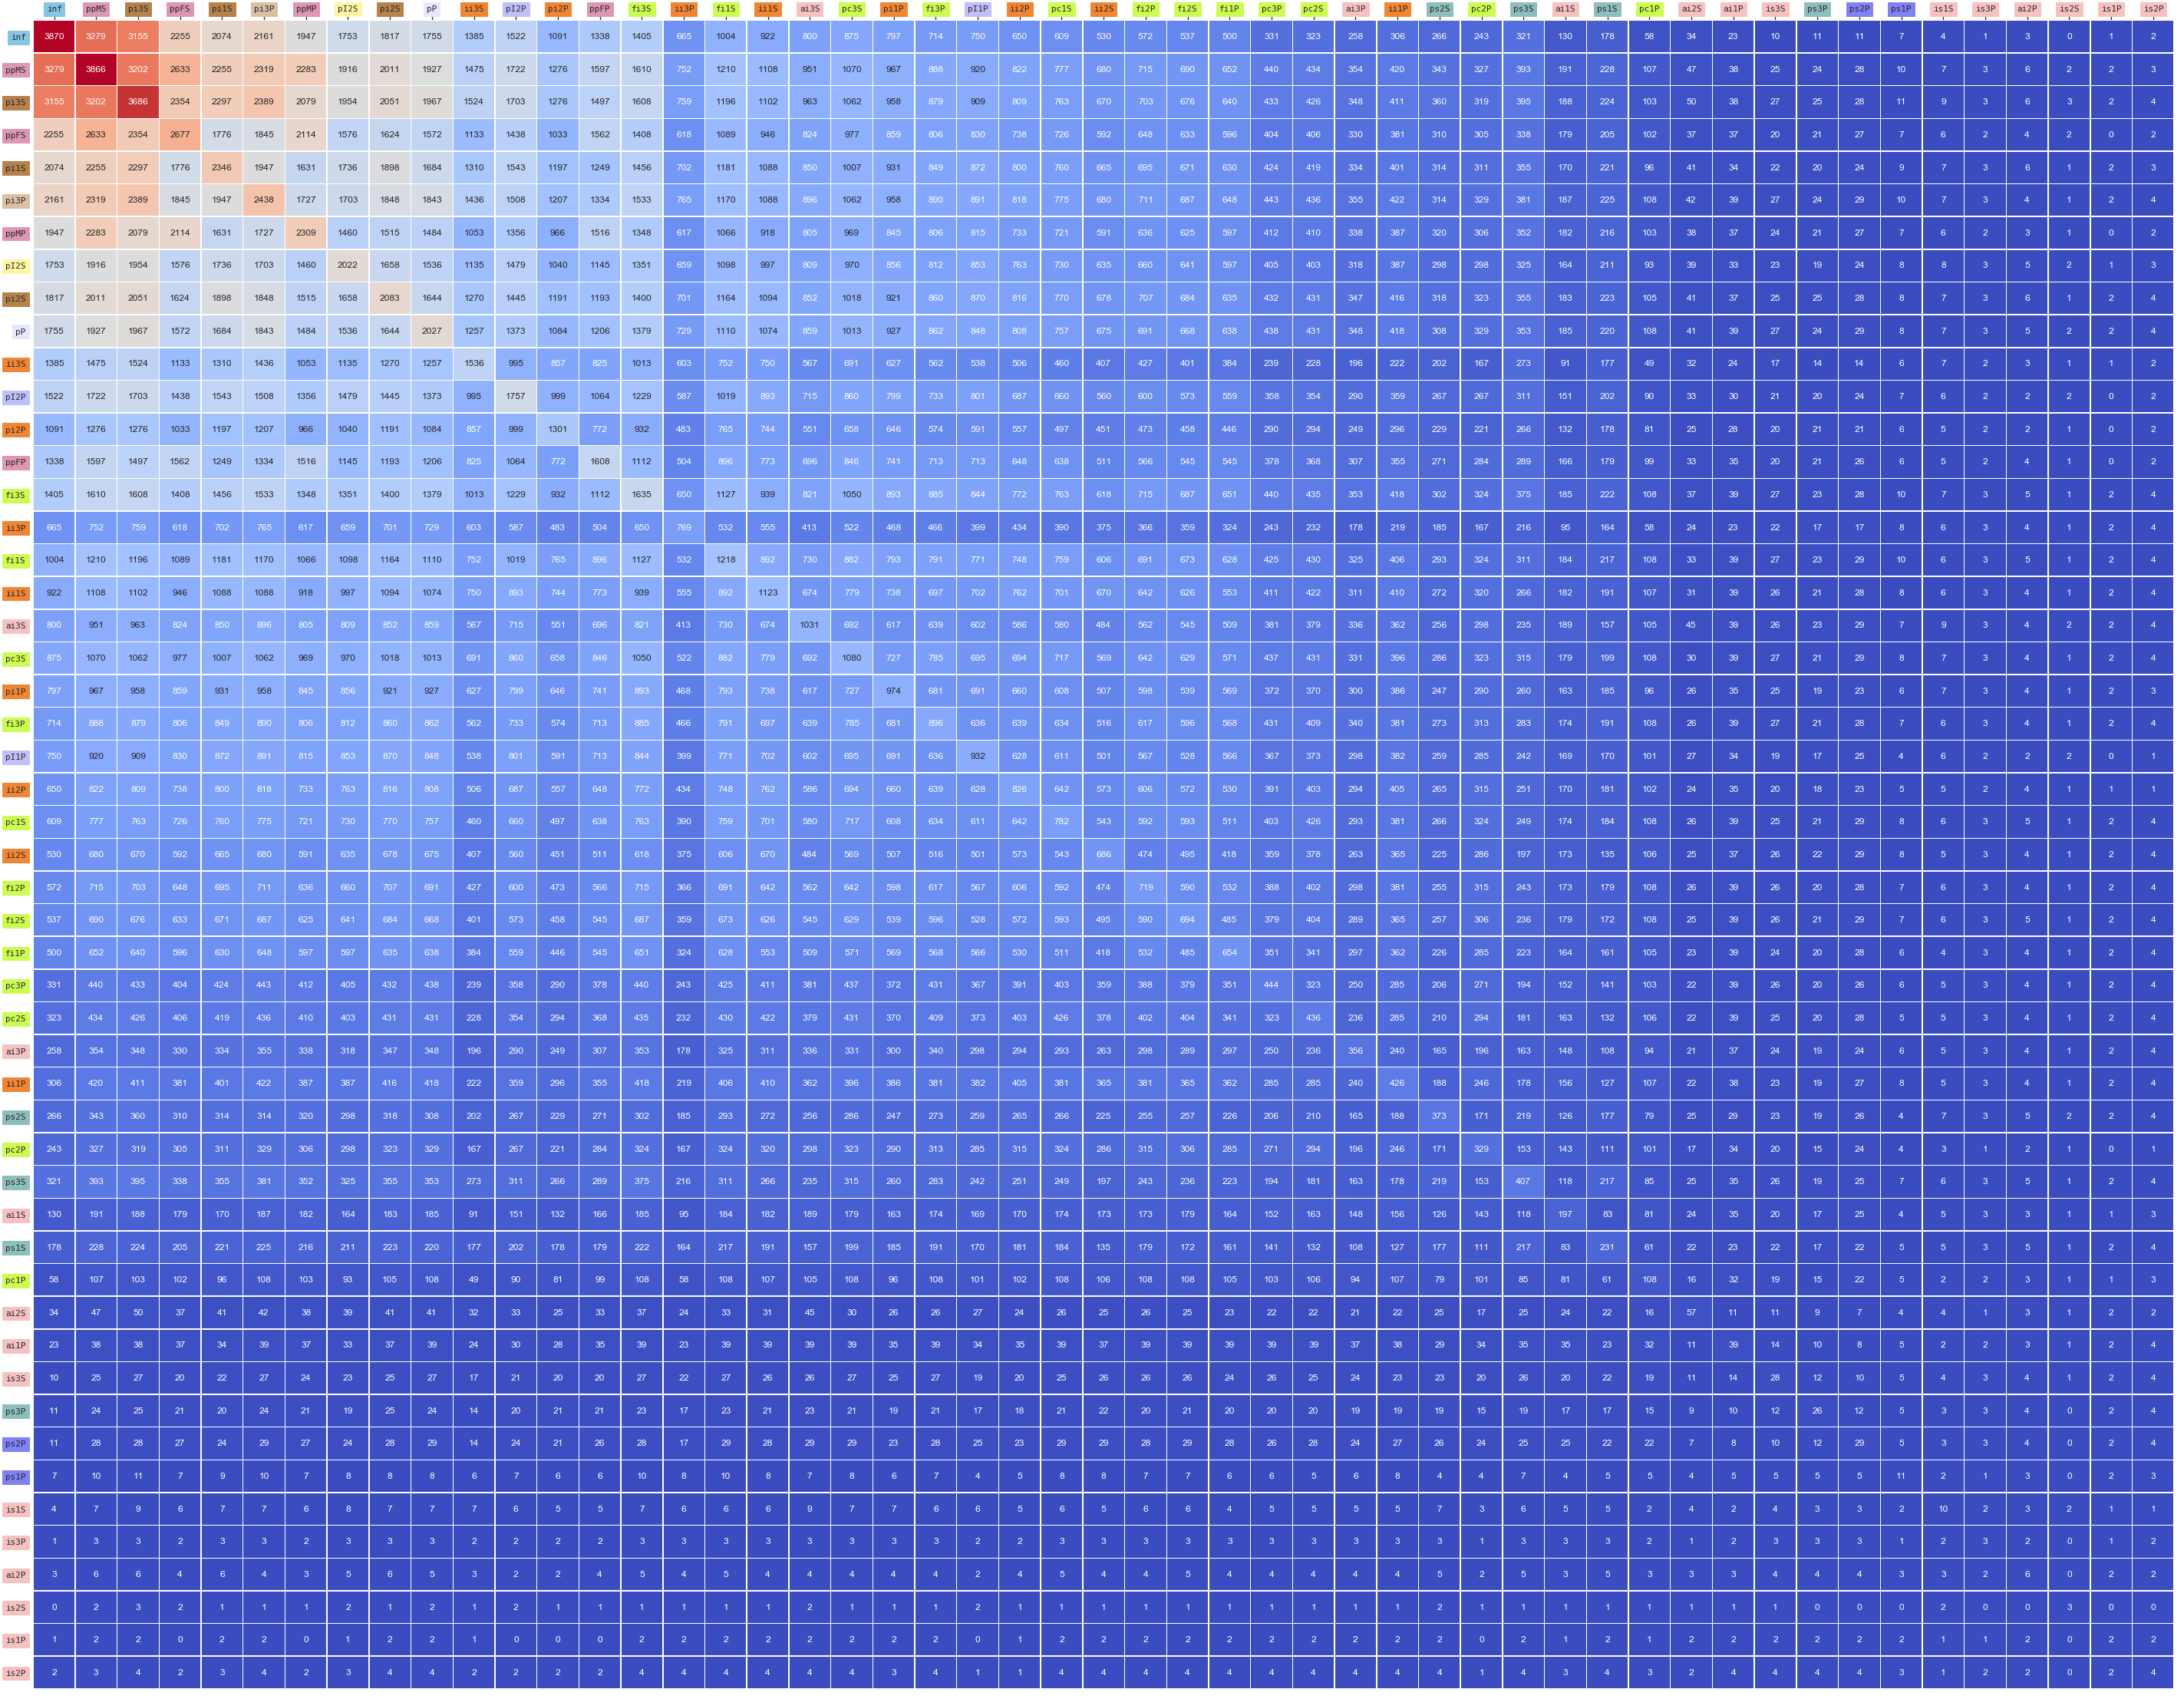

In [31]:
sns.set_style("white")
sns.set(rc={'figure.figsize':(50,40)})
ax=sns.heatmap(dfCoforms,annot=True,linewidth=.5,cmap="coolwarm",fmt="d",cbar=False)
ax.xaxis.tick_top()
ax.tick_params(axis='y', labelrotation=0)
colorerXTicks(ax,fSize=12)
colorerYTicks(ax,fSize=12)

In [32]:
ax.get_figure().savefig(repL4L+'HM-%s.pdf'%fName.split(".")[0],dpi=300, bbox_inches = "tight")  

In [18]:
dfCoformsNorm=pd.DataFrame(coforms)
dfCoformsNorm=dfCoformsNorm[colsCompletL4L].reindex(colsCompletL4L)

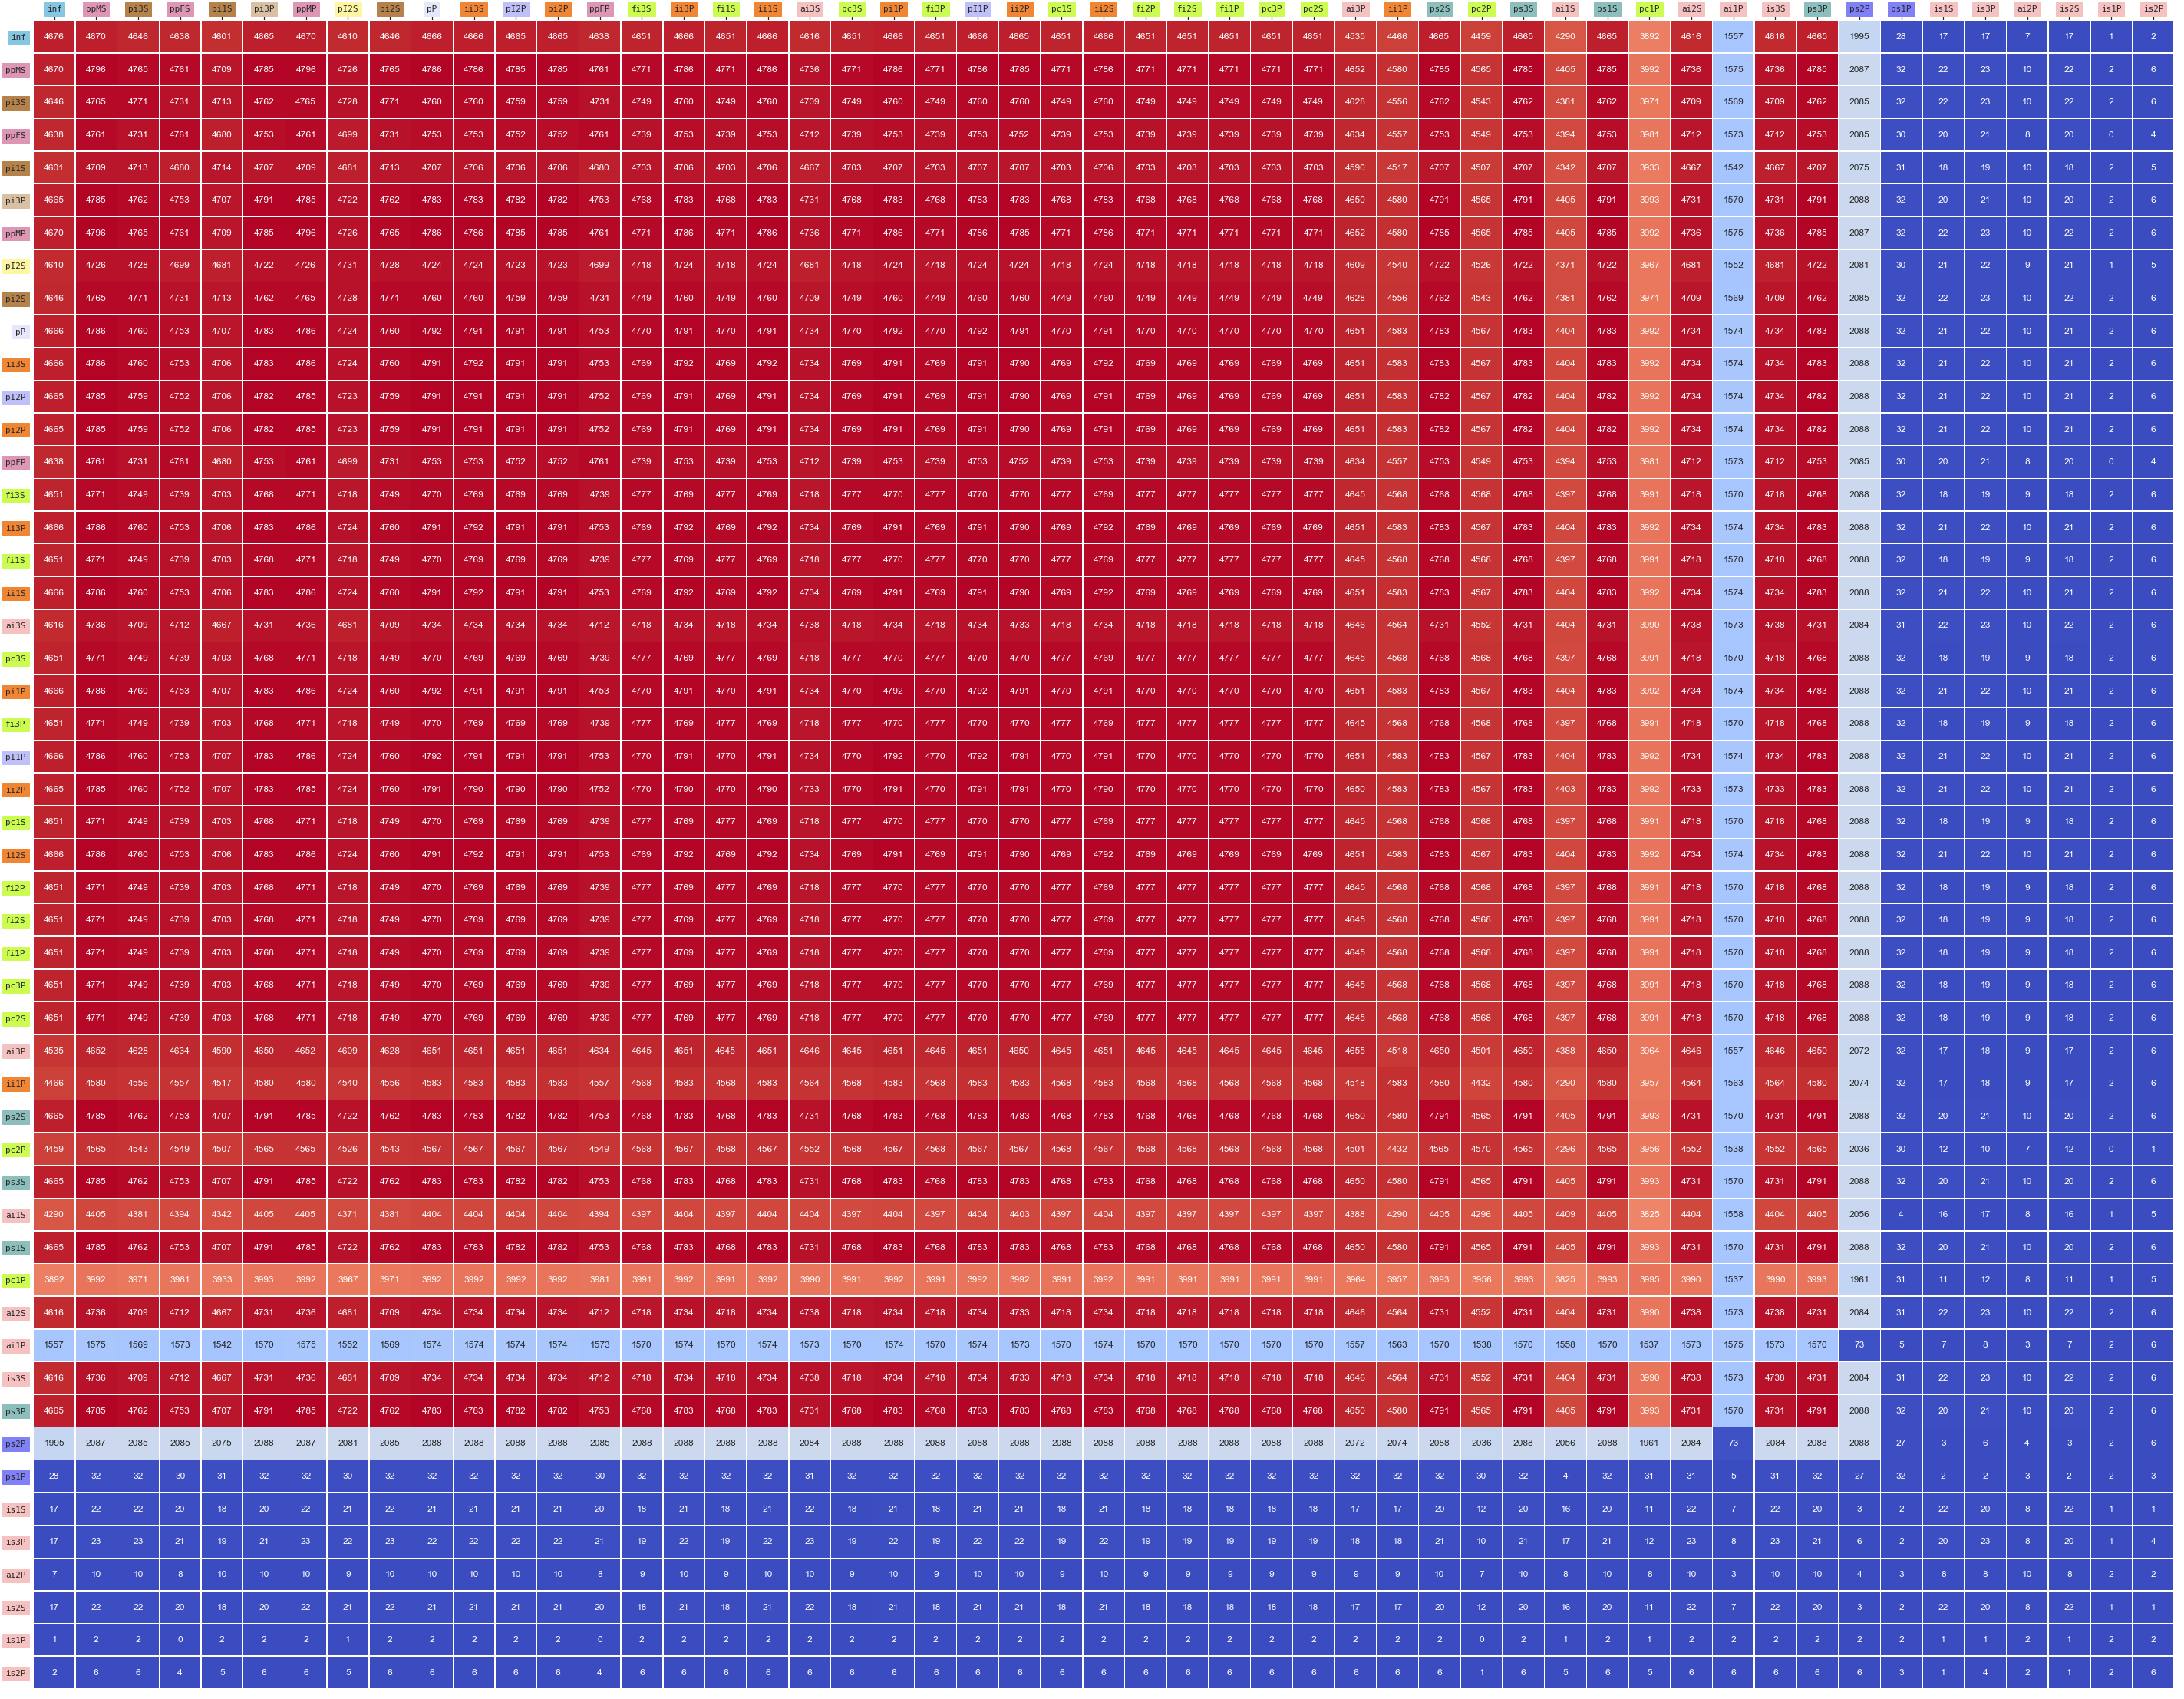

In [22]:
ax=sns.heatmap(dfCoformsNorm,annot=True,linewidth=.5,cmap="coolwarm",fmt="d",cbar=False)
ax.xaxis.tick_top()
ax.tick_params(axis='y', labelrotation=0)
colorerXTicks(ax,fSize=12)
colorerYTicks(ax,fSize=12)

In [23]:
ax.get_figure().savefig(repL4L+'HM-%s-Norm.pdf'%fName.split(".")[0],dpi=300, bbox_inches = "tight")  